# Задание 1.

Проанализируйте текст ниже с помощью майстема. Уберите из получившегося списка элементы, у которых нет грамматического разбора. Для каждего из оставшихся токенов выберите самый вероятный грамматический разбор. Из каждого разбора выделите только тег части речи. Посчитайте сколько раз встречается каждый тэг. Найдите самый частотный тэг. Какой процент от всего текста занимают слова с этим тэгом?

Вставьте ответ в форму в виде - `1` или `12` (округлите изначальное число до 2 знаков и умножьте на 100 или умножьте на 100 и округлите до целого числа) .


*Пример: для такого разбора "PR=" частеречный тэг - "PR", а для такого "S,муж,неод=твор,ед" - "S" *

In [4]:
text = """
Американская компания Fisker, основанная в 2016 году датским автомобильным дизайнером и предпринимателем Хенриком Фискером, еще несколько лет назад позиционировалась как конкурент Tesla и других электромобильных стартапов (таких как Lucid и Rivian). Однако неполадки с программным обеспечением кроссовера Ocean — единственной модели, которую смогла выпустить Fisker, — а также низкое качество сервиса и хаотичный стиль руководства привели компанию к краху. По оценкам конца 2023 года, ее убытки составляли 1,3 миллиарда долларов. «Медуза» рассказывает, почему, несмотря на амбициозные планы, проект Фискера провалился.
"""

In [29]:
import pymystem3
import re
from collections import Counter

In [5]:
m = pymystem3.Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [7]:
parsed = m.analyze(text)

In [15]:
res = [el for el in parsed if "analysis" in el.keys() and el["analysis"]]

In [27]:
tags = [re.findall("^[A-Z]*", el["analysis"][0]["gr"])[0] for el in res]

In [39]:
for k, v in Counter(tags).items():
    print(f"{k}: {str(int(v/len(tags)*100))}%")

A: 13%
S: 42%
V: 11%
PR: 7%
CONJ: 10%
ADV: 5%
NUM: 1%
APRO: 5%
ADVPRO: 2%


## Задание 2.

Вам дана последовательность с правильными ответами для задачи многоклассовой классификации. А также массив с предсказаниями такой же длины, но в виде вероятностей для каждого класса. Для каждой строчки выберете самый вероятный класс. Сравните полученные метки классов с правильными ответами с помощью f1-меры с макро усреднением по классам. Округлите полученную метрику до 2 знака после запятой и вставьте в форму для экзамена в соответствующее поле.

*также используйте параметр zero_division=0 если используете sklearn

In [40]:
import numpy as np

In [41]:
multiclass_true = [0,3,0,0,3,0,0,1,2,4,1,2,4,0,2,0,4,1,2,4,1,1,4,1,2,0]

In [42]:
probas = np.array([[0.14283307, 0.69125398, 0.08801677, 0.05890497, 0.01899121],
       [0.05017326, 0.16837714, 0.09787715, 0.37586925, 0.3077032 ],
       [0.07349622, 0.20737874, 0.06666821, 0.0582571 , 0.59419973],
       [0.08704361, 0.18970222, 0.16262277, 0.08630088, 0.47433053],
       [0.16137361, 0.21450292, 0.22870402, 0.24422044, 0.151199  ],
       [0.268094  , 0.43761478, 0.12385365, 0.04917541, 0.12126215],
       [0.27161954, 0.01412896, 0.11056462, 0.09468905, 0.50899783],
       [0.09363269, 0.02693918, 0.33977914, 0.39909705, 0.14055195],
       [0.29520778, 0.05132426, 0.06673668, 0.45254433, 0.13418695],
       [0.15421375, 0.22964685, 0.16662999, 0.21004033, 0.23946907],
       [0.24755032, 0.24628846, 0.12956078, 0.24832473, 0.12827571],
       [0.11797719, 0.03232272, 0.07293219, 0.52455883, 0.25220907],
       [0.75835945, 0.07189134, 0.06032446, 0.04986686, 0.05955789],
       [0.02601848, 0.26673495, 0.03124844, 0.21992134, 0.4560768 ],
       [0.58059452, 0.03148405, 0.11400383, 0.14452069, 0.12939691],
       [0.08215579, 0.32887402, 0.10776154, 0.30880314, 0.17240552],
       [0.11467395, 0.07250172, 0.03868279, 0.04358503, 0.73055651],
       [0.09546111, 0.22318028, 0.04797582, 0.42230537, 0.21107742],
       [0.17088269, 0.31617363, 0.02329777, 0.26480448, 0.22484143],
       [0.1573525 , 0.04416687, 0.59056588, 0.0854817 , 0.12243306],
       [0.16300152, 0.224168  , 0.11143585, 0.09995103, 0.4014436 ],
       [0.17649215, 0.32146966, 0.21575183, 0.0238604 , 0.26242596],
       [0.00860468, 0.01201256, 0.96059244, 0.00327634, 0.01551398],
       [0.06455855, 0.11772163, 0.25971348, 0.32510222, 0.23290411],
       [0.04150647, 0.1329052 , 0.22146507, 0.03930956, 0.5648137 ],
       [0.12671909, 0.01486602, 0.77637796, 0.06239952, 0.01963741]])

In [46]:
probas.argmax(axis=1)

array([1, 3, 4, 4, 3, 1, 4, 3, 3, 4, 3, 3, 0, 4, 0, 1, 4, 3, 1, 2, 4, 1,
       2, 3, 4, 2])

In [43]:
from sklearn.metrics import f1_score

In [57]:
"{:.2f}".format(f1_score(multiclass_true, probas.argmax(axis=1), average="macro", zero_division=0))

'0.18'

## Задание 3

Загрузите модель `openai/clip-vit-base-patch32`. Рассчитайте близость (similarity score) между данной картинкой и текстом. Окгруглите значение до 2 знака после запятой и вставьте в форму

*вам нужен logit а не значение после софтмакса (текст у вас один и софтмакс даст 1.0)


In [33]:
image_url = "https://i.ibb.co/fYQkR4L/Ewl-AFp-TWUAA0-GEu.jpg"

In [34]:
text = "собака повар готовит сырники"

In [35]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [36]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

In [37]:
import matplotlib.pyplot as plt

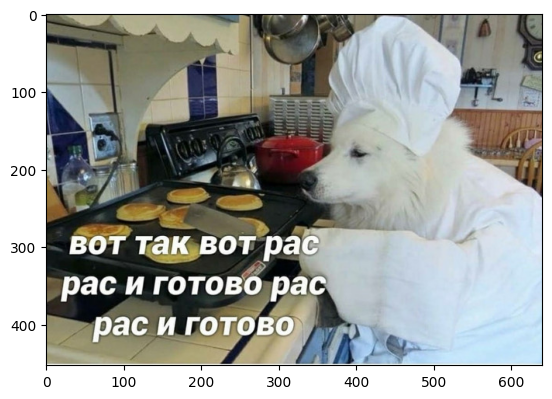

In [38]:
plt.imshow(img)

In [40]:
text = "собака повар готовит сырники"

inputs = processor(text=[text], images=img, return_tensors="pt", padding=True)

outputs = model(**inputs)
logit = outputs.logits_per_image.item()

logit

28.79569435119629

In [7]:
inp = processor(images=[img], return_tensors="pt")

In [9]:
image_embeddings = model.get_image_features(**inp).detach().cpu().numpy()

In [11]:
image_embeddings.shape

(1, 512)

In [12]:
inp_text = processor(text=[text], return_tensors="pt")

In [13]:
text_embeddings = model.get_text_features(**inp_text).detach().cpu().numpy()

In [14]:
text_embeddings.shape

(1, 512)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
"{:.2f}".format(cosine_similarity(image_embeddings, text_embeddings)[0, 0])

'0.29'

# Задание 4

Используя модель "microsoft/Phi-3-mini-4k-instruct" (huggingface), сгенерируйте ответ на следующую инструкцию:
"Tell me a joke about natural language processing?".

Используйте следующее параметры при генерации: максимальная длина продолжения - 38 токенов, отсутствие повторов длиной 2 токена, отсутствие семплирования (выбирается только самый вероятный токен).

Модель должна быть загружена в 4bit формате.

Вставьте сгенерированный текст в форму целиком (кавычки лучше не включать, но сработает и с ними)



In [4]:
# !pip install bitsandbytes accelerate
# может понадобиться сделать restart session после установки библиотек

In [19]:
messages = [
    {"role": "user", "content": "Tell me a joke about natural language processing?"},
]

In [22]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch
quantization_config = BitsAndBytesConfig(
        load_in_4bit=True, bnb_4bit_use_double_quant=True
    )

tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct", 
                                             trust_remote_code=True, quantization_config=quantization_config)

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/931 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

In [25]:
from transformers import pipeline

pipe = pipeline('text-generation', model=model, tokenizer=tokenizer)

with torch.autocast('cuda', dtype=torch.float16):
    print(pipe(messages,
        max_new_tokens=38, do_sample=False, no_repeat_ngram_size=2,
            use_cache=True))


[{'generated_text': [{'role': 'user', 'content': 'Tell me a joke about natural language processing?'}, {'role': 'assistant', 'content': " Why did the machine learning model break up with linguistics? Because it needed more data to understand the complexities of human language and couldn't handle the emotional nuances!\n\n"}]}]


In [26]:
del tokenizer, model, pipe
import gc
gc.collect()
torch.cuda.empty_cache()

# Задание 5

C помощью модели `segmind/SSD-1B` сгенерируйте картинку со следующими параметрами:
промпт - "a colorful English letter"
отрицательный промпт - "blurry, bad quality, unreadable"
guidance scale - 10.0
ширина - 768
высота - 1024
количество шагов - 16

В качестве seed поставьте число "1231473"

Какая буква на картинке? Вставьте ответ в форму (одна буква в верхнем регистре, например `A`).

In [11]:
# !pip install diffusers

In [27]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, StableDiffusionXLPipeline
from diffusers.utils import load_image
from PIL import Image
from torchvision import transforms
to_512 = transforms.Resize(512)
to_256 = transforms.Resize(256)

pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
_ = pipe.to("cuda")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

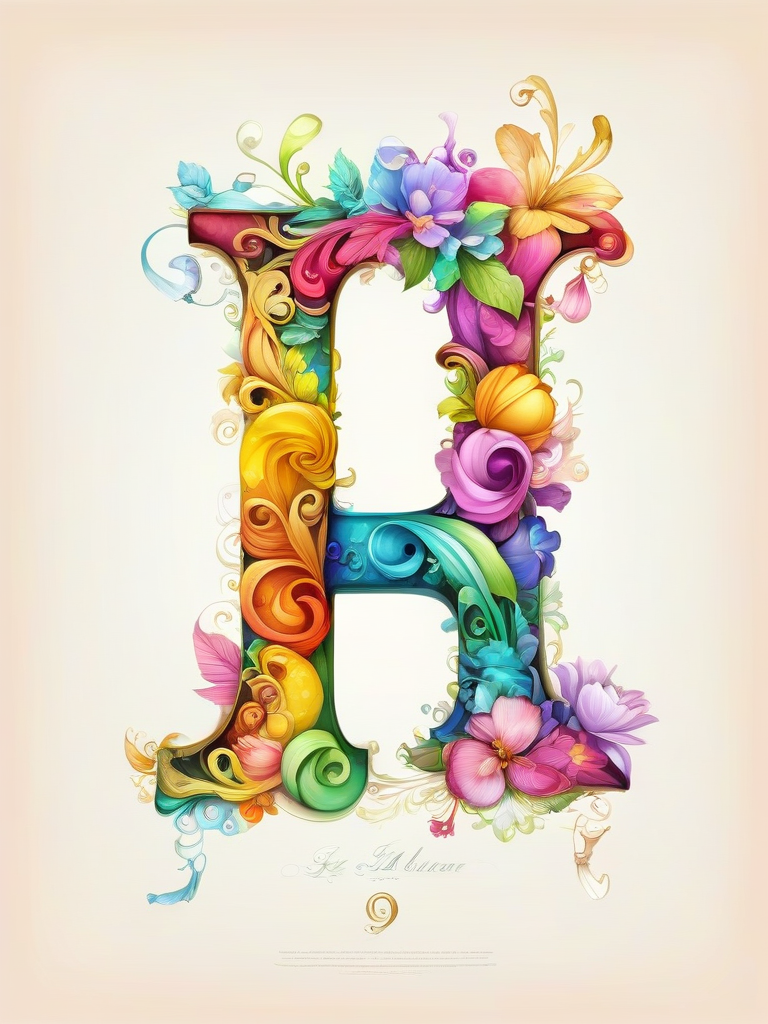

In [29]:
pipe(**{"prompt": "a colorful English letter",
    "negative_prompt": "blurry, bad quality, unreadable",
    "guidance_scale": 10,
    "num_inference_steps": 16,
    "height": 1024,
    "width": 768,
    "generator": torch.Generator('cuda').manual_seed(1231473),
    }).images[0]

In [32]:
del pipe

gc.collect()
torch.cuda.empty_cache()